In [67]:
!pip install pyspark
!pip install findspark

  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764040 sha256=bca572565fab632edd5fc08802206c35369d654b6744cc39c40865d6a45ece6c
  Stored in directory: c:\users\gpoon\appdata\local\pip\cache\wheels\05\75\73\81f84d174299abca38dd6a06a5b98b08ae25fce50ab8986fa1
Successfully built pyspark


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pyspark
import findspark
findspark.init()
from pyspark.sql import SparkSession

%matplotlib inline

In [58]:
df1 = pd.read_csv('Genre_Table_No_Index.csv')
df2 = pd.read_csv('Artist_Table_No_Commas.csv')
df3 = pd.read_csv('Songtitle_No_Commas.csv')
master_df = pd.read_csv('Spotify-2000.csv')

In [5]:
df1.head()

Genre_ID            Top Genre
0         0      adult standards
1         1           album rock
2         2  alternative hip hop
3         3    alternative metal
4         4         classic rock

In [6]:
df3.head()

Title_ID                   Title  Year Length (Duration)  \
0         0                 Sunrise  2004               201   
1         1             Black Night  2000               207   
2         2          Clint Eastwood  2001               341   
3         3           The Pretender  2007               269   
4         4  Waitin' On A Sunny Day  2002               256   

   Beats Per Minute (BPM)  Danceability  Popularity  Energy  Artist_ID  \
0                     157            53          71      30          0   
1                     135            50          39      79         47   
2                     168            66          69      69        163   
3                     173            43          76      96        164   
4                     106            58          59      82        194   

   Genre_ID  
0         0  
1         1  
2         2  
3         3  
4         4

<AxesSubplot:xlabel='Year', ylabel='Genre_ID'>

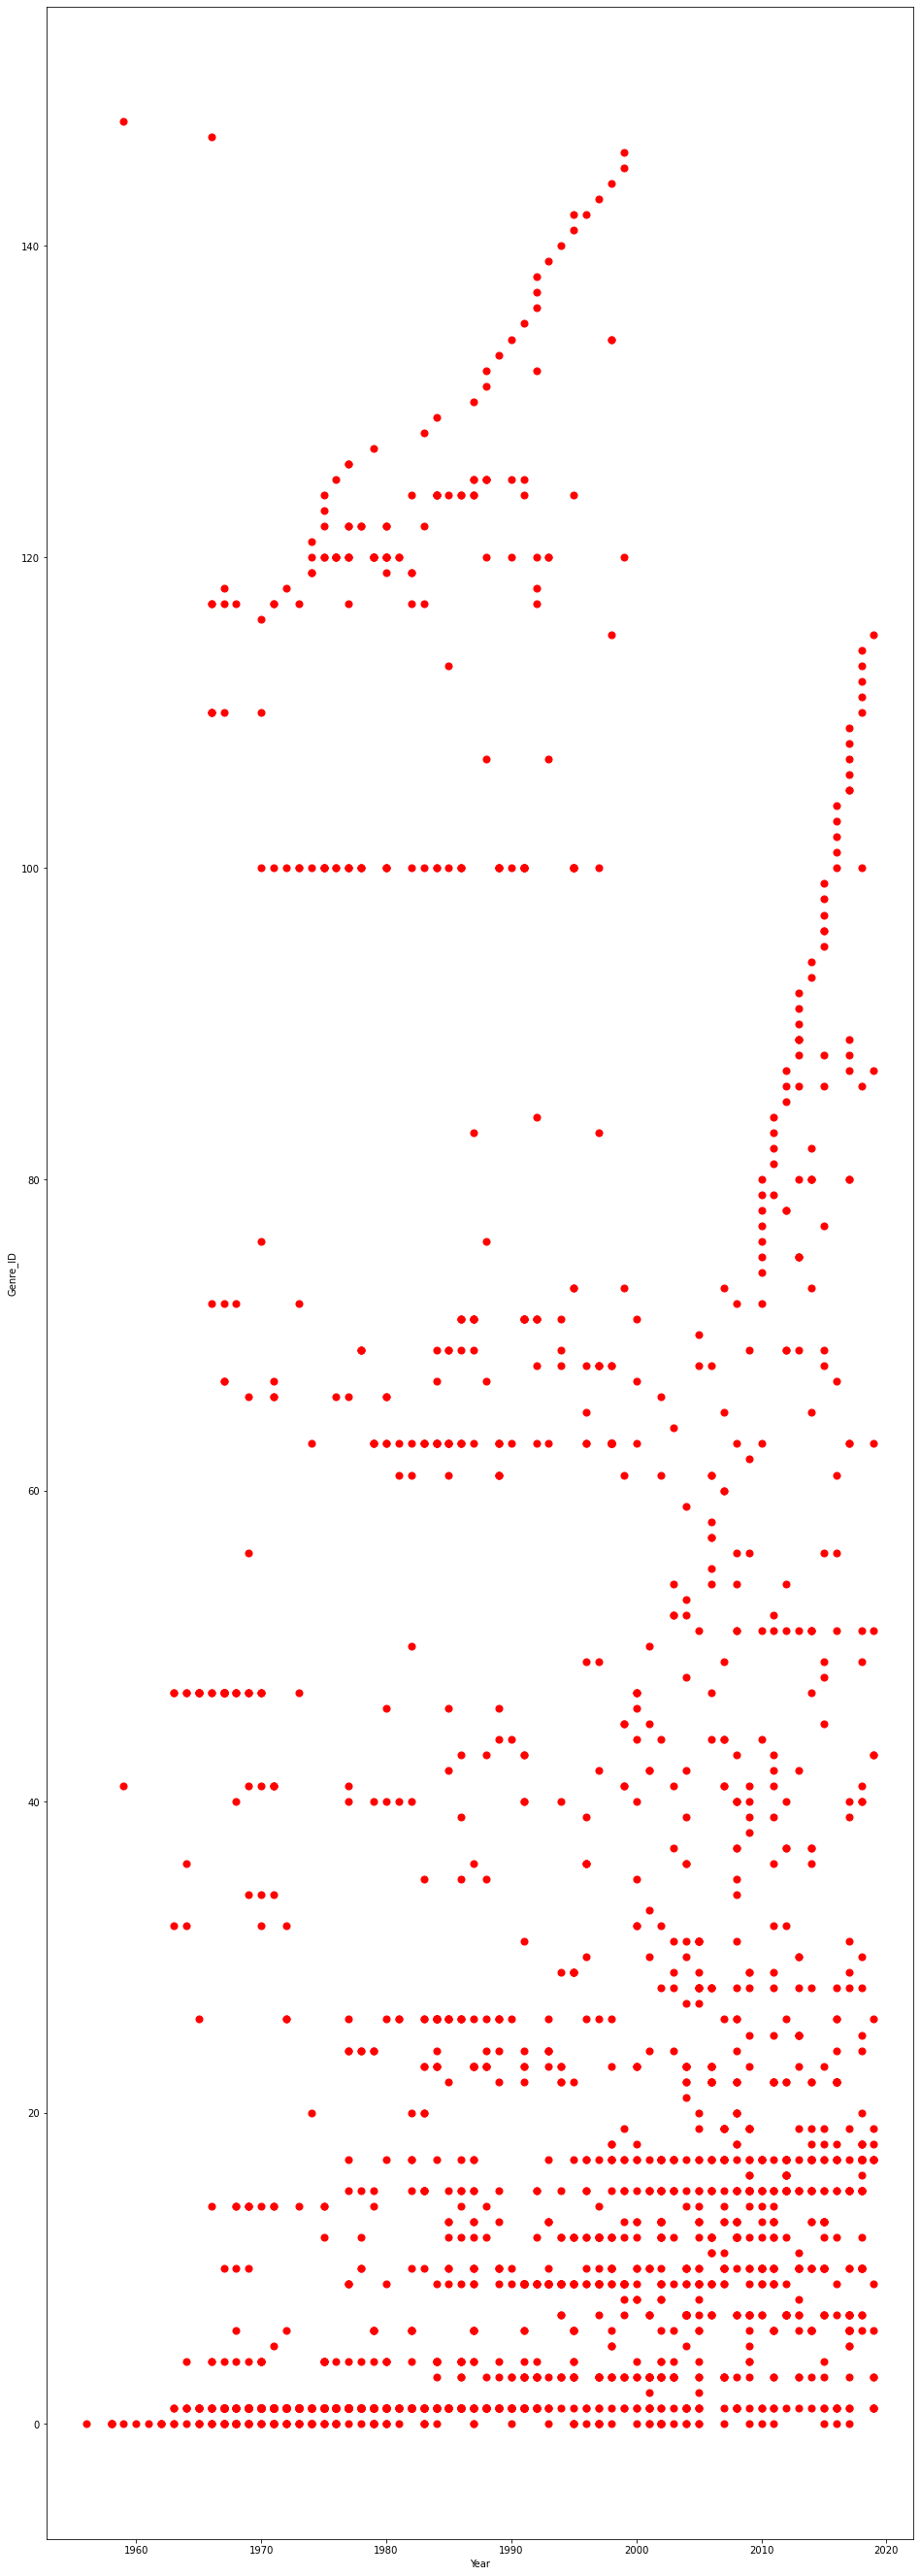

In [9]:
df3.plot.scatter(x='Year', y='Genre_ID', c='red', s=50, figsize=(16,48))

<AxesSubplot:ylabel='Frequency'>

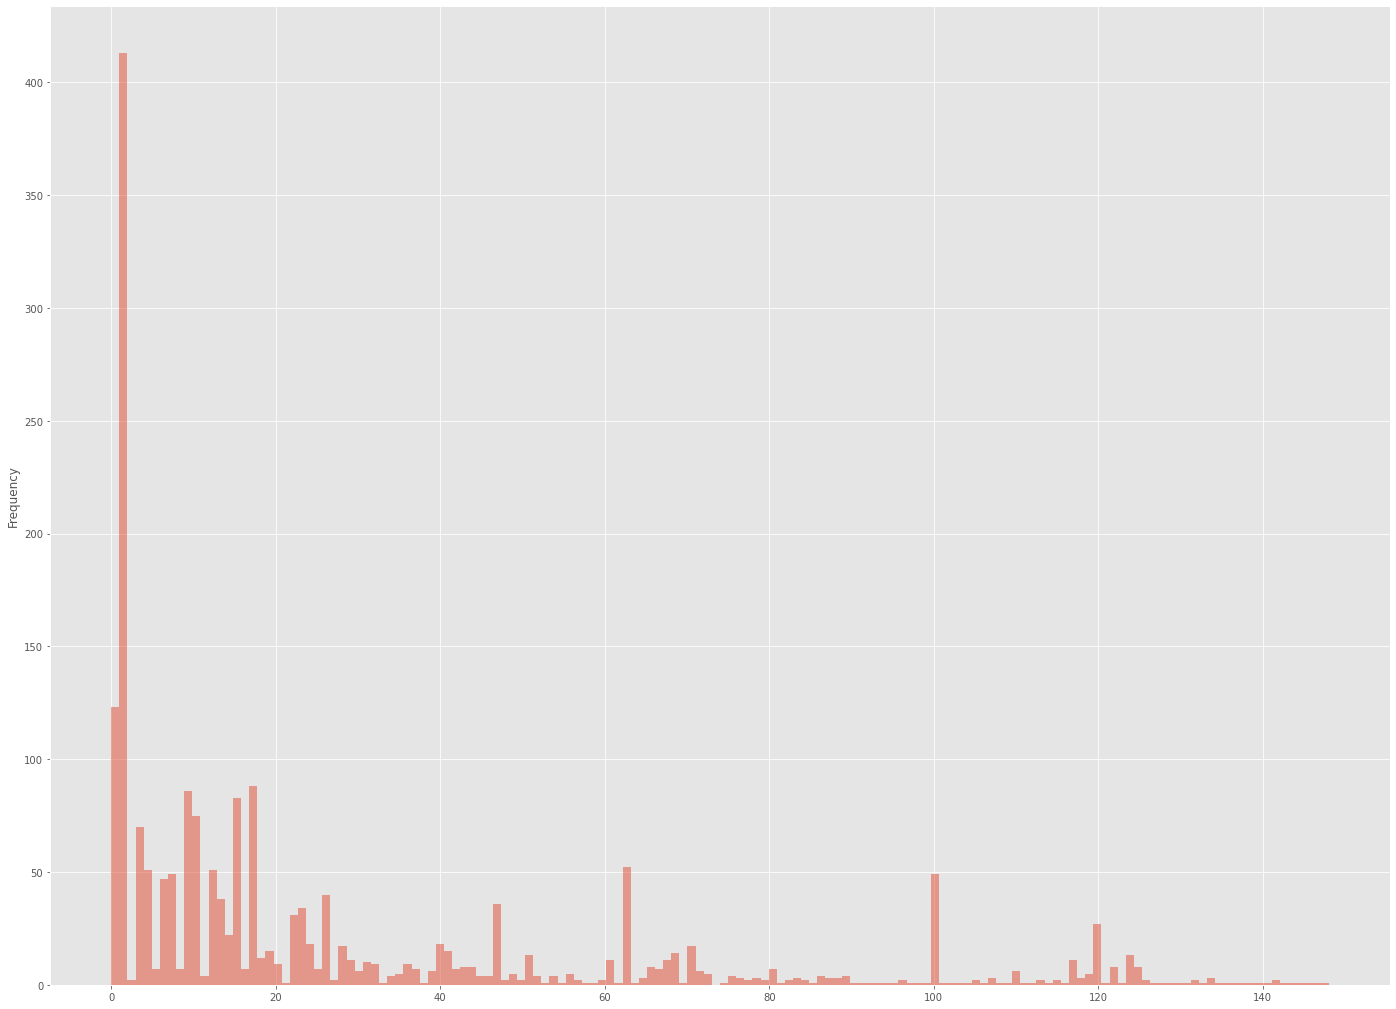

In [25]:
plt.style.use('ggplot')

df3['Genre_ID'].plot.hist(alpha=0.5, bins=150, figsize=(24,18))

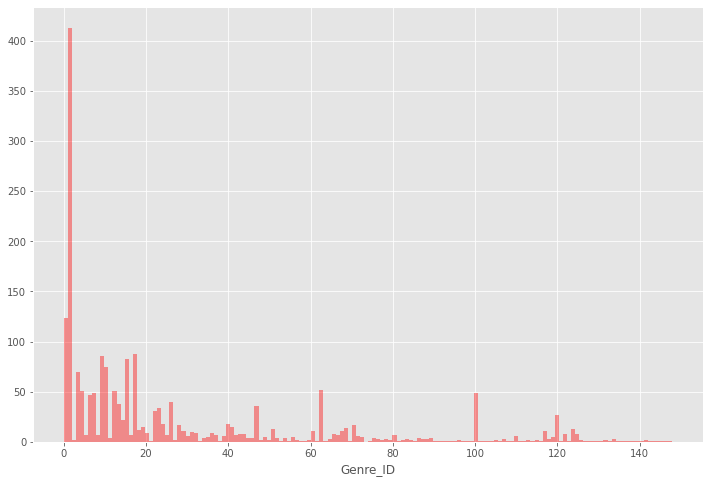

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.distplot(df3['Genre_ID'],bins=150,kde=False,color='red')

<AxesSubplot:xlabel='Year', ylabel='Popularity'>

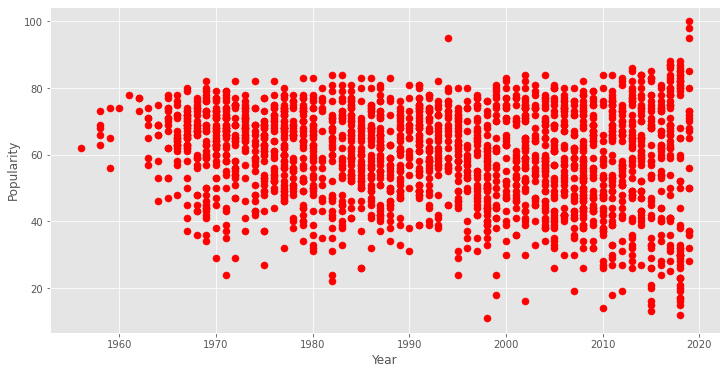

In [45]:
df3.plot.scatter(x='Year', y='Popularity', c='red', s=50, figsize=(12,6))

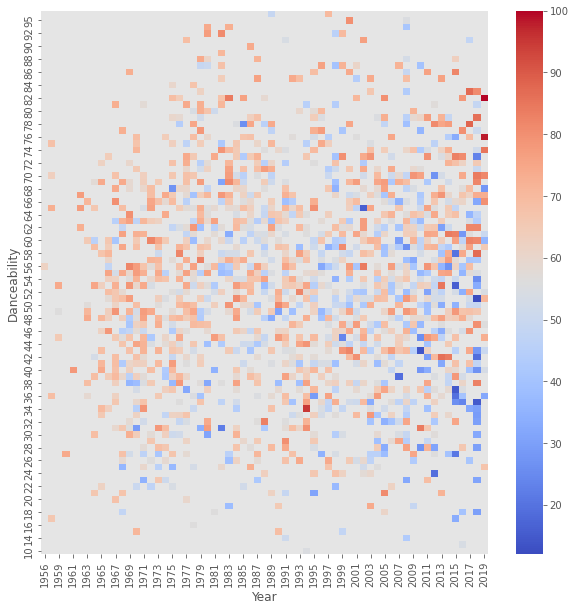

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
pop_corr = df3.pivot_table(values='Popularity', index='Danceability', columns='Year')
ax = sns.heatmap(pop_corr,cmap='coolwarm')
ax.invert_yaxis()

<AxesSubplot:xlabel='Top Genre', ylabel='count'>

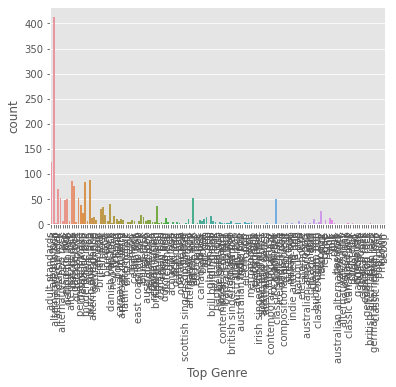

In [66]:
plt.xticks(rotation=90)
sns.countplot(x='Top Genre', data=master_df)

In [75]:
master_df.columns

Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
       'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')

In [83]:
genre_df = master_df[["Top Genre"]]
genre_df

Top Genre
0         adult standards
1              album rock
2     alternative hip hop
3       alternative metal
4            classic rock
...                   ...
1989      adult standards
1990      adult standards
1991           blues rock
1992                bebop
1993      adult standards

[1994 rows x 1 columns]

In [118]:
genre_df_byCount = genre_df.groupby(['Top Genre'], as_index = True).size().reset_index(name='count')
genre_df_byCount

Top Genre  count
0           acid jazz      1
1        acoustic pop      4
2     adult standards    123
3             afropop      1
4        alaska indie      1
..                ...    ...
144  stomp and holler      1
145        streektaal      1
146            trance      1
147            uk pop      1
148        yacht rock      1

[149 rows x 2 columns]

In [163]:
testdf = genre_df_byCount.groupby(['count']).value_counts().tail(50)
testdf

count  Top Genre        
7      big room             1
       canadian folk        1
       celtic rock          1
       chamber pop          1
       detroit hip hop      1
       electro              1
       modern folk rock     1
8      australian pop       1
       belgian rock         1
       blues                1
       folk                 1
       reggae               1
9      arkansas country     1
       chanson              1
       german pop           1
10     carnaval limburg     1
11     big beat             1
       britpop              1
       classic soul         1
       mellow gold          1
12     dutch americana      1
13     funk                 1
       dutch hip hop        1
14     art pop              1
15     alternative dance    1
       blues rock           1
17     glam metal           1
       neo mellow           1
18     disco                1
       dutch rock           1
22     classic uk pop       1
27     europop              1
31     british 

ValueError: Could not interpret input 'Top Genre'

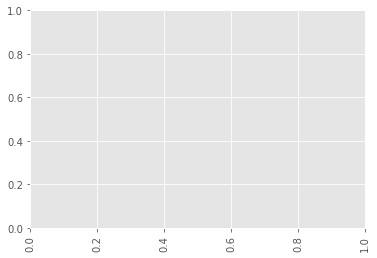

In [161]:
plt.xticks(rotation=90)
sns.countplot(x ='Top Genre',data=testdf)